# Finals Data

Given that not all teams made it to the finals, the focus is to see how they each contributed to a champion's success. Another feature of interest is the years of playoff experience. 

Need to still visualize and understand season's data to see where team ranks in offensive and defensive measures.

In [9]:
#modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.graphics.api as smg
import scipy.stats

%matplotlib inline

In [10]:
#get finals data for players and coaches
players = pd.read_csv('players_trim.csv', index_col='Unnamed: 0').reset_index(drop=True)
coaches = pd.read_csv('coaches.csv', index_col='Unnamed: 0').reset_index(drop=True)
print('players:', players.shape)
print('coaches:', coaches.shape)

#separate finals data for later
player_finals = players[(players['Champ']==1) | (players['Runner-Up']==1)]
coach_finals = coaches[(coaches['Champ']==1) | (coaches['Runner-Up']==1)]
print('\nplayers finals:', player_finals.shape)
print('coaches finals:', coach_finals.shape)

#features for each table
print('\nPlayer features:\n', player_finals.columns.values)
print('\nCoach features:\n', coach_finals.columns.values)

players: (6076, 32)
coaches: (332, 26)

players finals: (352, 32)
coaches finals: (21, 26)

Player features:
 ['Player' 'Pos' 'Age' 'Tm' 'G' 'GS' 'MP' 'FG' 'FGA' 'FG%' '3P' '3PA' '3P%'
 '2P' '2PA' '2P%' 'eFG%' 'FT' 'FTA' 'FT%' 'ORB' 'DRB' 'TRB' 'AST' 'STL'
 'BLK' 'TOV' 'PF' 'PTS' 'Year' 'Champ' 'Runner-Up']

Coach features:
 ['Coach' 'Team' 'F-Seasons' 'Car-Seasons' 'CR-G' 'CR-W' 'CR-L' 'FR-G'
 'FR-W' 'FR-L' 'Car-G' 'Car-W' 'Car-L' 'Car-W%' 'CP-G' 'CP-W' 'CP-L'
 'FP-G' 'FP-W' 'FP-L' 'Car.P-G' 'Car.P-W' 'Car.P-L' 'Year' 'Champ'
 'Runner-Up']


In [11]:
#split features
player_num_features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
player_cat_features = ['Player', 'Pos', 'Tm', 'Year', 'Champ', 'Runner-Up']

coach_num_features = ['F-Seasons', 'Car-Seasons', 'CR-G', 'CR-W', 'CR-L', 'FR-G', 'FR-W', 'FR-L', 'Car-G', 'Car-W', 'Car-L', 'Car-W%', 'CP-G', 'CP-W', 'CP-L', 'FP-G', 'FP-W', 'FP-L', 'Car.P-G', 'Car.P-W', 'Car.P-L']
coach_cat_features = ['Coach', 'Team', 'Year', 'Champ', 'Runner-Up']

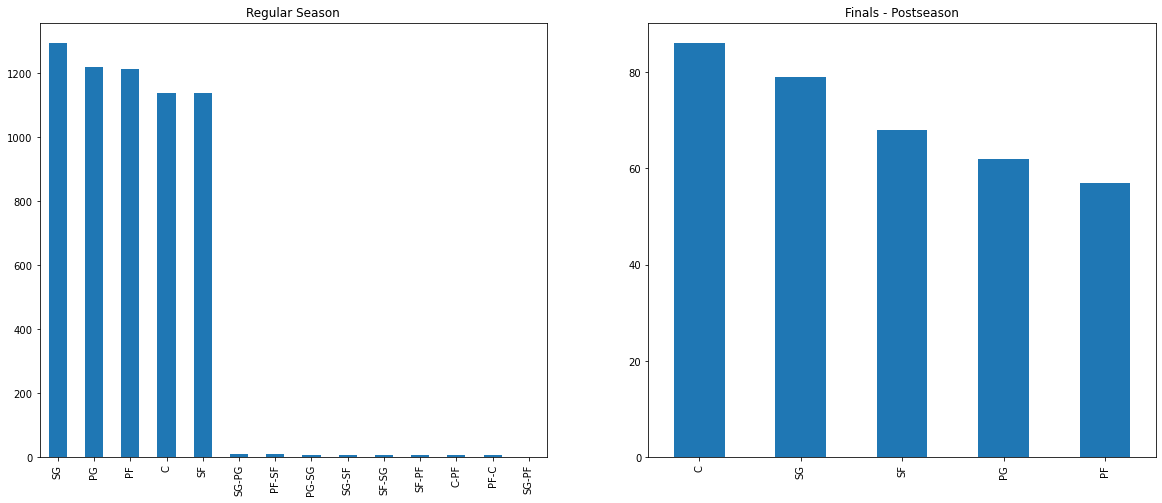

In [12]:
#position distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
pd.value_counts(players['Pos']).plot.bar(ax=ax1)
pd.value_counts(player_finals['Pos']).plot.bar(ax=ax2)
ax1.set_title('Regular Season')
ax2.set_title('Finals - Postseason')
plt.show()

### Player Positions:  
In the regular seasons, positions are more interchangeable. To make further analysis more feasible, these will be placed as frontcourt (FC) and backcourt (BC) players:
- BC = SG, PG combinations
- FC = SF, PF, C combinations

### Ambigious Positions:
- If a player falls under both, their post-season position or listed position over their career will be used.
- We examine them below to see what they are most identifiable as by position. It is most likely top stars who are known to handle multiple team roles because of their many capabilities e.g. Lebron James

In [50]:
df_other_positions = players[(players['Pos']=='SG-SF') | (players['Pos']=='SF-SG') | (players['Pos']=='SG-PF')]
df_other_positions.describe()

Age         G         GS  ...         Year  Champ  Runner-Up
count  20.000000  20.00000  20.000000  ...    20.000000   20.0       20.0
mean   28.100000  55.45000  21.700000  ...  2014.050000    0.0        0.0
std     4.024922  19.48677  27.247598  ...     3.605186    0.0        0.0
min    21.000000   7.00000   0.000000  ...  2010.000000    0.0        0.0
25%    25.750000  42.00000   2.000000  ...  2010.750000    0.0        0.0
50%    28.500000  57.50000   8.500000  ...  2013.500000    0.0        0.0
75%    31.000000  70.50000  25.500000  ...  2018.000000    0.0        0.0
max    37.000000  81.00000  81.000000  ...  2019.000000    0.0        0.0

[8 rows x 29 columns]

In [53]:
#Position assignments to see what is prominent
df_other_positions.Pos.value_counts()

SG-SF    9
SF-SG    9
SG-PF    2
Name: Pos, dtype: int64

In [55]:
#see what the short hand means. Does the first position indicate the usual position or vice versa for each player?
df_other_positions[['Player', 'Pos']]

Player    Pos
86          Caron Butler  SF-SG
280      Stephen Jackson  SG-PF
309            Coby Karl  SF-SG
461         Quinton Ross  SF-SG
532         Henry Walker  SG-SF
659         Corey Brewer  SF-SG
1015      Sasha Pavlović  SG-SF
1026     Mickaël Piétrus  SG-SF
1761      James Anderson  SG-SF
1913    Francisco García  SG-SF
2785        John Salmons  SG-SF
3370    Quincy Pondexter  SF-SG
3404  Glenn Robinson III  SG-SF
4104         Sonny Weems  SG-SF
4798        Corey Brewer  SF-SG
5157    Shabazz Muhammad  SF-SG
5480        Jimmy Butler  SF-SG
5751         Kyle Korver  SG-PF
5809     Wesley Matthews  SF-SG
5971    Jonathon Simmons  SG-SF

Something interesting to note about these players. They never made it to the finals, so the theory about them being great players is not true because most of the great players of this generation have at least made it to the finals or the playoffs. Next we see the distribution of these 20 players across ten years.

**Distribution:** Given that most of the players are in the SG/SF combination, we checked to see if the order in which the position was tagged gives insight into the player's usual position. This didn't really help because if we look at two examples:
- Corey Brewer is a SF -> listed as SF-SG twice, and
- Kyle Korver is a SG -> listed as SG-PF BUT
- Jimmy Butler and Stephen Jackson are SG/SF really and listed as such or in SJ case, SG-PF.

### Positions Decision
Given this, I have decided to use the first listed position for each player to indicate where they fall in the front or back court. It could be argued that most SF nowadays shoot more than they defend so they are defacto FC players. However, we are going to leave these distinctions so that we can observe if any of the offense parameters change overt time for these types of players. Additionally, since it is only 20/6000+, this should not affect the statistical significance of any decisions hereafter.

In [62]:
#method for adding new front court and back court designation for all players
def player_positions(pos):
    if pos in ['SG', 'PG', 'SG-PG', 'PG-SG']:
        return 'BC'
    elif pos in ['PF', 'SF', 'C', 'C-PF', 'PF-C', 'SF-PF', 'PF-SF']:
        return 'FC'
    else:
        return player_positions(pos[0:2])


In [63]:
#create new column and append to dataframe
players['Court_Pos'] = players['Pos'].apply(lambda x: player_positions(x))

In [64]:
#preview of updated dataframe
players.head()

Player Pos   Age   Tm  ...  Year  Champ  Runner-Up  Court_Pos
0      Arron Afflalo  SG  24.0  DEN  ...  2010      0          0         BC
1      Alexis Ajinça   C  21.0  CHA  ...  2010      0          0         FC
2  LaMarcus Aldridge  PF  24.0  POR  ...  2010      0          0         FC
3      Joe Alexander  SF  23.0  CHI  ...  2010      0          0         FC
4        Malik Allen  PF  31.0  DEN  ...  2010      0          0         FC

[5 rows x 33 columns]

In [66]:
#resaving a copy for the next steps
players.to_csv('players_trim.csv')
#reset player_finals table segment
player_finals = players[(players['Champ']==1) | (players['Runner-Up']==1)]
#dataframe copy for manipulation
df_player = players.copy()
df_coach = coaches.copy()

#features of finals players
player_finals[player_num_features].describe()

Age           G          GS  ...         TOV          PF         PTS
count  352.000000  352.000000  352.000000  ...  352.000000  352.000000  352.000000
mean    28.278409   49.872159   22.840909  ...    1.082386    1.631250    8.080398
std      4.436547   25.533133   29.009532  ...    0.839466    0.725239    6.774398
min     19.000000    1.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     25.000000   26.000000    0.750000  ...    0.500000    1.100000    3.375000
50%     28.000000   57.000000    6.000000  ...    0.800000    1.600000    5.950000
75%     32.000000   73.000000   50.250000  ...    1.500000    2.100000   10.225000
max     39.000000   82.000000   82.000000  ...    4.200000    6.000000   30.100000

[8 rows x 26 columns]

***My initial assumption*** was that we would have five unique values (PG, SG, SF, PF, C). However, there are players that play multiple roles consistently throughout the season. Given this, I'm going to add a class for whether it is a frontcourt or backcourt player. There is still the issue of intersections as we have players in the SF-SG and SG-PF bars.

**Decision so far** Data exploration focused on just the finals teams for the last ten years.

### Positions:
Shooters are generally guards (or so we think). Want to see how the finals players highest scores and number of players are distributed by position.

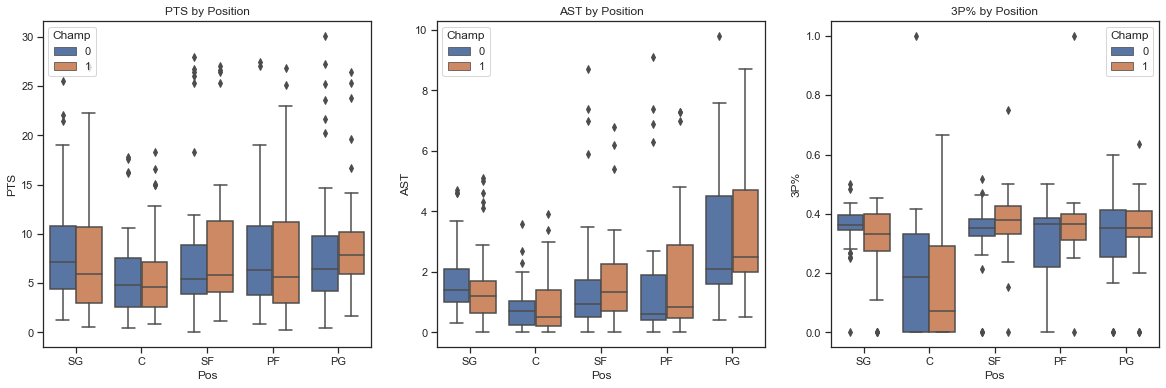

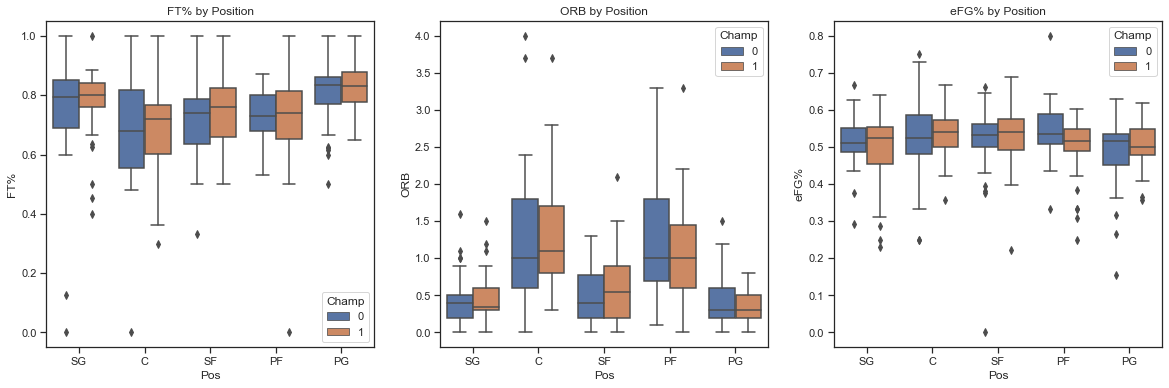

In [44]:
#plot for finals
# We don't need to use B/FC designations yet because we didn't have intersections in the finals data
offense = ['PTS', 'AST', '3P%', 'FT%', 'ORB', 'eFG%']
#first three variables
fig1, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,6))
for i, a in zip(offense[0:3], [ax1, ax2, ax3]):
    a.set_title(i+' by Court Position')
    sns.boxplot(x='Pos', y=i, data=player_finals, hue='Champ', ax=a)
#next three variables
fig2, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,6))
for i, a in zip(offense[3:6], [ax1, ax2, ax3]):
    a.set_title(i+' by Court Position')
    sns.boxplot(x='Pos', y=i, data=player_finals, hue='Champ', ax=a)
plt.show()

## Offense observations:
Bla bla bla bla 
abla '  
blacblabva 

nvldkvnskvnsf

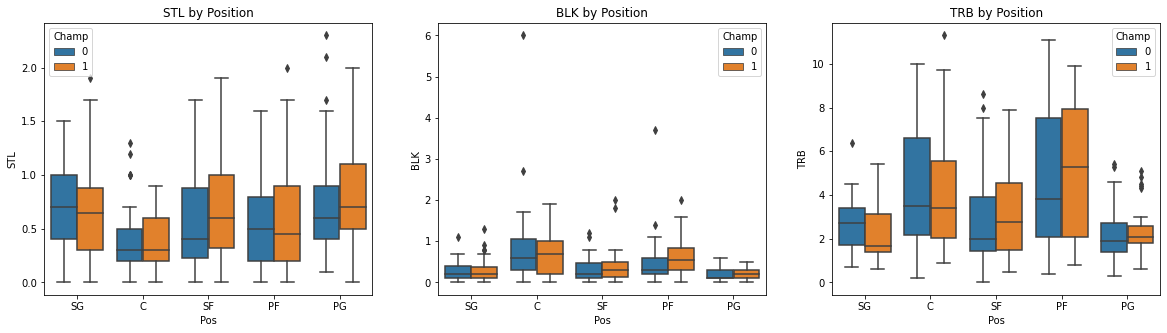

In [15]:
defense = ['STL', 'BLK', 'TRB']
fig, ([ax1, ax2, ax3]) = plt.subplots(ncols=3, figsize=(20,5))
for d, a in zip(defense, [ax1, ax2, ax3]):
    a.set_title(d+' by Position')
    sns.boxplot(x='Pos', y=d, data=player_finals, hue='Champ', ax=a)
plt.show()

## Defense observations:
Bla bla bla bla 
abla '  
blacblabva 

nvldkvnskvnsf


### Correlations between important features
Trying to decipher what is strongly correlated with wins and losses or winning a championship in this case using the features that are most identifiable as offensive and defensive measures. Instead of using FG% AND 3FG%, we will use the effective field goal percentage which accounts for a three pointer being worth more points than a two pointer (eFG%). Also adding turnovers to see how well the team's possession of the ball affects the other measures

In [67]:
game_measures = ['PTS', 'AST', 'ORB', 'eFG%','STL', 'BLK', 'TRB', 'TOV', 'Champ']

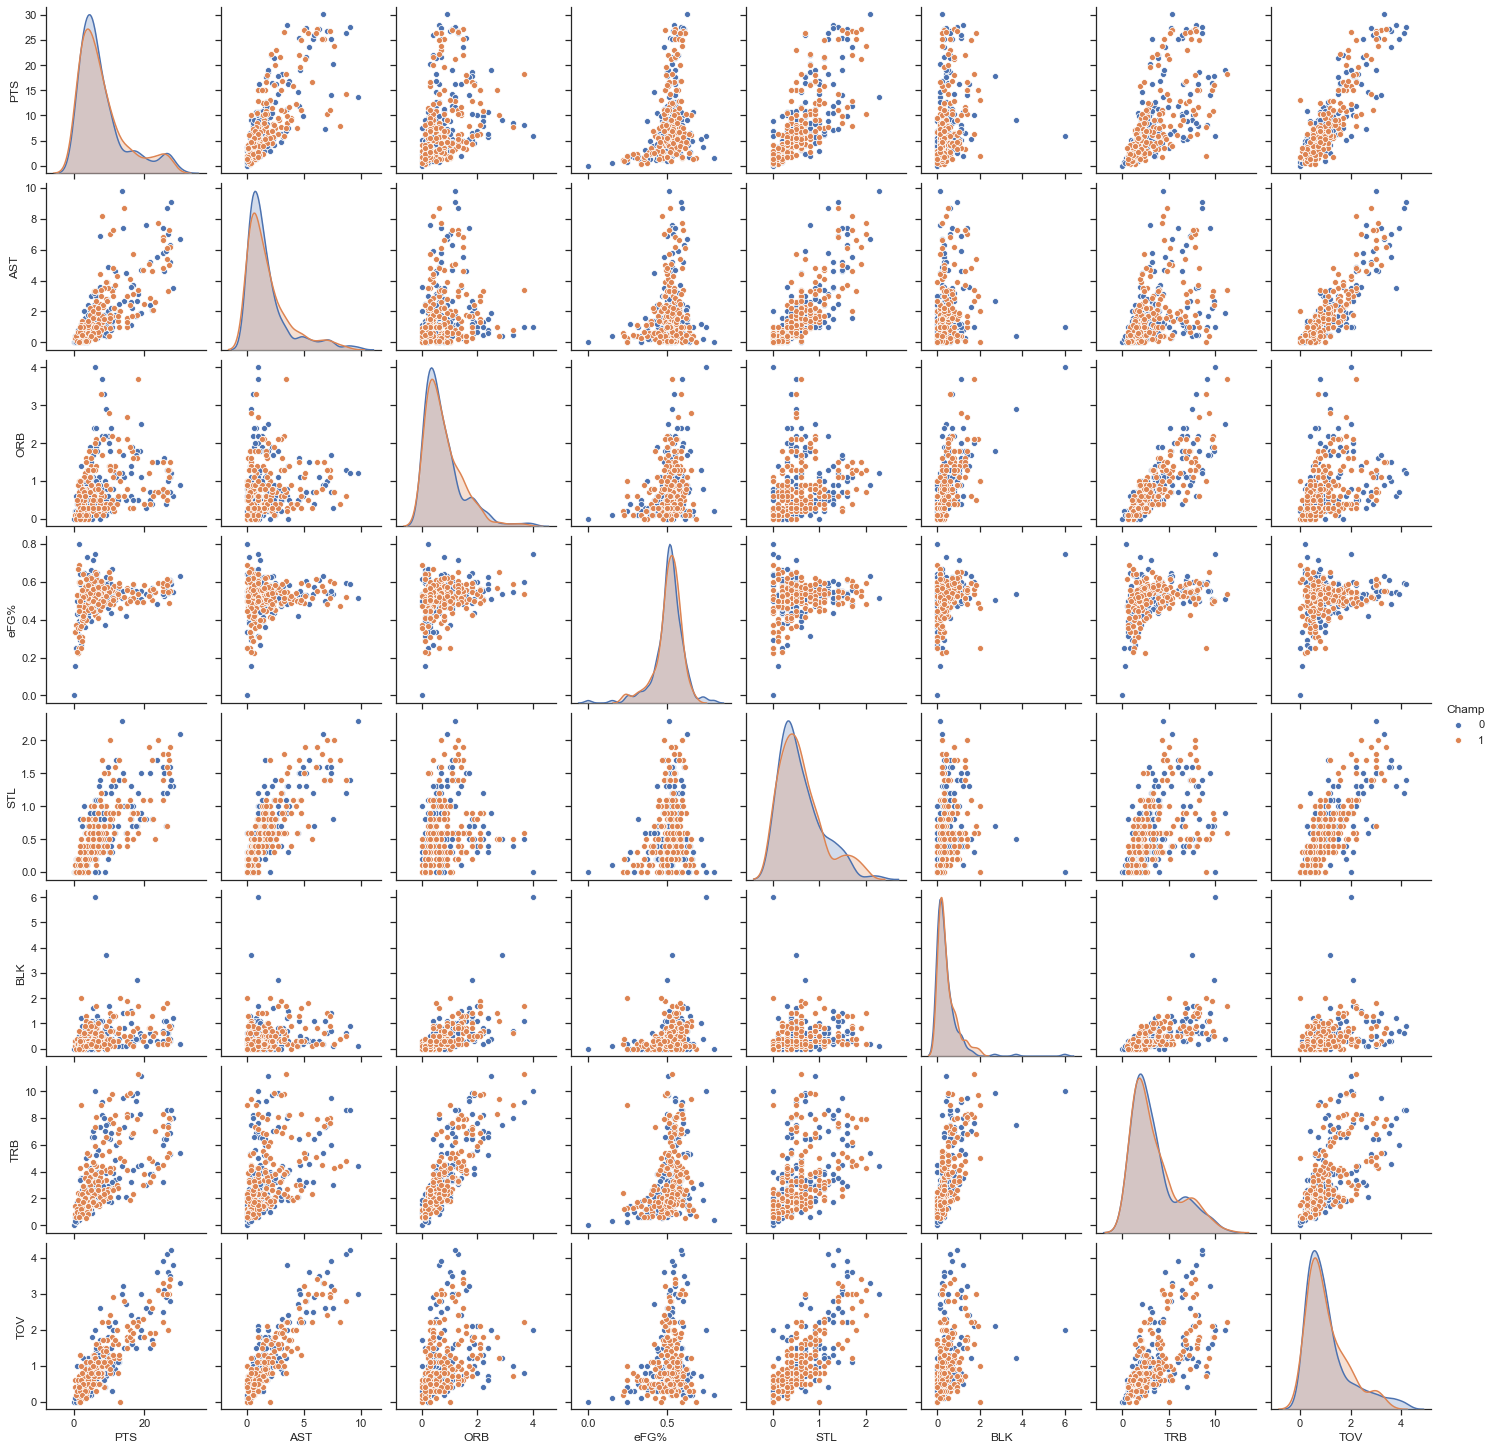

In [40]:
#correlation plot of main measures
sns.set(style='ticks', color_codes=True)
sns.pairplot(player_finals[game_measures], hue='Champ')
plt.show()

It seems when teams make it to the finals, they are mostly evenly matched in terms of scoring and defense measures. May be helpful to:
- Review all the teams and compare them to those that won
- Another approach would be to review the teams that made it to the playoffs against those that went to the finals
- A new feature that could be introduced is the number of years of experience for each player in the finals to see how this factors into performance

**Decision:** Adding years of experience feature for each player that made it to the finals. This will be done on the data wrangling file.

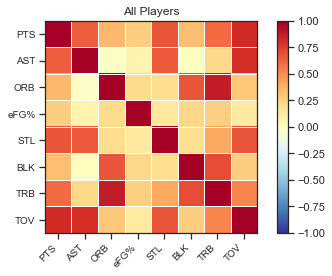

In [71]:
#correlation matrix for all teams vs finals teams
#game_measures.remove('Champ')
smg.plot_corr(df_player[game_measures].corr(), xnames=game_measures, normcolor=(-1,1), title='All Players')
plt.show()

Based on comparison for all teams (regular season and finals teams), the following observations can be made:
- Turnovers for a player are highly correlated with the steals and total rebounds on the defensive side
- Turnovers also have a high correlation with points and assists for the player on the offensive side of the ball
- This may infer that the person who touches the ball the most will have the highest chance of impacting the game by whether they gain possessions and score, or how they lose possessions (turnovers which help the other team score)

### Next observations:
Would like to see how distribution of finals teams and non-finals teams by frontcourt and backcourt players. (Recall: designation for FC/BC was made because there are players who play multiple positions and this helps visualize better how their court positions impact the outcomes)